In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
divvy_data = pd.read_csv("Divvy_Trips_20231115.csv")

In [5]:
divvy_data.shape

(21242740, 18)

In [6]:
divvy_data.head(10)

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION
0,8546790,12/31/2015 05:35:00 PM,12/31/2015 05:44:00 PM,979,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739)
1,8546793,12/31/2015 05:37:00 PM,12/31/2015 05:41:00 PM,1932,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613)
2,8546795,12/31/2015 05:37:00 PM,12/31/2015 05:40:00 PM,1693,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968)
3,8546797,12/31/2015 05:38:00 PM,12/31/2015 05:55:00 PM,3370,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892)
4,8546798,12/31/2015 05:38:00 PM,12/31/2015 05:41:00 PM,2563,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666)
5,8546799,12/31/2015 05:39:00 PM,12/31/2015 05:52:00 PM,1039,808,280,Morgan St & 31st St,282,Halsted St & Maxwell St,Subscriber,Male,1980.0,41.837800,-87.651140,POINT (-87.65114 41.8378),41.864883,-87.647071,POINT (-87.647071 41.864883)
6,8546803,12/31/2015 05:40:00 PM,12/31/2015 05:43:00 PM,1233,194,174,Canal St & Madison St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.882091,-87.639833,POINT (-87.639833 41.882091),41.881892,-87.648789,POINT (-87.648789 41.881892)
7,8546805,12/31/2015 05:40:00 PM,12/31/2015 05:45:00 PM,2489,309,277,Ashland Ave & Grand Ave,30,Ashland Ave & Augusta Blvd,Subscriber,Male,1987.0,41.891072,-87.666611,POINT (-87.666611 41.891072),41.899643,-87.667700,POINT (-87.6677 41.899643)
8,8546813,12/31/2015 05:41:00 PM,12/31/2015 05:53:00 PM,436,674,54,Ogden Ave & Chicago Ave,181,LaSalle St & Illinois St,Subscriber,Male,1987.0,41.896362,-87.654061,POINT (-87.654061 41.896362),41.890749,-87.632060,POINT (-87.63206 41.890749)
9,10000,06/30/2013 10:46:00 AM,06/30/2013 11:41:00 AM,338,3260,85,Michigan Ave & Oak St,90,Millennium Park,Customer,NaN,NaN,41.900960,-87.623777,POINT (-87.623777 41.90096),41.881032,-87.624084,POINT (-87.624084 41.881032)


In [7]:
# Convert time stamp to pandas datetime objects
divvy_data['START TIME'] = pd.to_datetime(divvy_data['START TIME'], format="%m/%d/%Y %I:%M:%S %p")
divvy_data['STOP TIME'] = pd.to_datetime(divvy_data['STOP TIME'], format="%m/%d/%Y %I:%M:%S %p")

In [8]:
divvy_data['Start Month'] = divvy_data['START TIME'].dt.month
divvy_data['Start Day'] = divvy_data['START TIME'].dt.day
divvy_data['Start Year'] = divvy_data['START TIME'].dt.year
divvy_data['Start Time'] = divvy_data['START TIME'].dt.strftime('%H%M')

In [9]:
divvy_data['Stop Month'] = divvy_data['STOP TIME'].dt.month
divvy_data['Stop Day'] = divvy_data['STOP TIME'].dt.day
divvy_data['Stop Year'] = divvy_data['STOP TIME'].dt.year
divvy_data['Stop Time'] = divvy_data['STOP TIME'].dt.strftime('%H%M')

In [10]:
divvy_data.columns

Index(['TRIP ID', 'START TIME', 'STOP TIME', 'BIKE ID', 'TRIP DURATION',
       'FROM STATION ID', 'FROM STATION NAME', 'TO STATION ID',
       'TO STATION NAME', 'USER TYPE', 'GENDER', 'BIRTH YEAR', 'FROM LATITUDE',
       'FROM LONGITUDE', 'FROM LOCATION', 'TO LATITUDE', 'TO LONGITUDE',
       'TO LOCATION', 'Start Month', 'Start Day', 'Start Year', 'Start Time',
       'Stop Month', 'Stop Day', 'Stop Year', 'Stop Time'],
      dtype='object')

In [11]:
# Proportion of User Type
user_counts = divvy_data['USER TYPE'].value_counts()
print("Counts of each user type:")
print(user_counts)

Counts of each user type:
USER TYPE
Subscriber    15910819
Customer       5331723
Dependent          198
Name: count, dtype: int64


In [12]:
total_users = divvy_data['USER TYPE'].count()
prop = user_counts / total_users
print('Proportions of each user type')
print(prop)

Proportions of each user type
USER TYPE
Subscriber    0.749000
Customer      0.250990
Dependent     0.000009
Name: count, dtype: float64


In [13]:
# Gender breakdown
gender_count = divvy_data['GENDER'].value_counts()
print("Count of gender type for subscribers")
print(gender_count)
print()
gender_total = divvy_data['GENDER'].count()
prop = gender_count / gender_total
print('Proporitions of gender ridership:', prop)

Count of gender type for subscribers
GENDER
Male      12235452
Female     4112418
Name: count, dtype: int64

Proporitions of gender ridership: GENDER
Male      0.748443
Female    0.251557
Name: count, dtype: float64


In [14]:
# Which station has the most starts and stops
from_station_count = divvy_data['FROM STATION NAME'].value_counts()
print("Stations with most rides started:")
print(from_station_count.head())
print()
to_station_count = divvy_data['TO STATION NAME'].value_counts()
print("Stations with most rides ended:")
print(to_station_count.head())

Stations with most rides started:
FROM STATION NAME
Streeter Dr & Grand Ave         322534
Lake Shore Dr & Monroe St       296230
Clinton St & Washington Blvd    285137
Canal St & Adams St             274760
Theater on the Lake             248945
Name: count, dtype: int64

Stations with most rides ended:
TO STATION NAME
Streeter Dr & Grand Ave         365462
Clinton St & Washington Blvd    280744
Lake Shore Dr & Monroe St       273695
Theater on the Lake             267808
Canal St & Adams St             264702
Name: count, dtype: int64


In [15]:
# Age distribution
divvy_data['Rider Age'] = divvy_data['Start Year'] - divvy_data['BIRTH YEAR']
divvy_data.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),12,31,2015,1735,12,31,2015,1744,24.0
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),12,31,2015,1737,12,31,2015,1741,23.0
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),12,31,2015,1737,12,31,2015,1740,28.0
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),12,31,2015,1738,12,31,2015,1755,40.0
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),12,31,2015,1738,12,31,2015,1741,25.0


In [16]:
# Millions formatter
def millions_formatter(x, pos):
    return f'{int(x / 1_000_000)}M'

In [17]:
import matplotlib.ticker as mticker

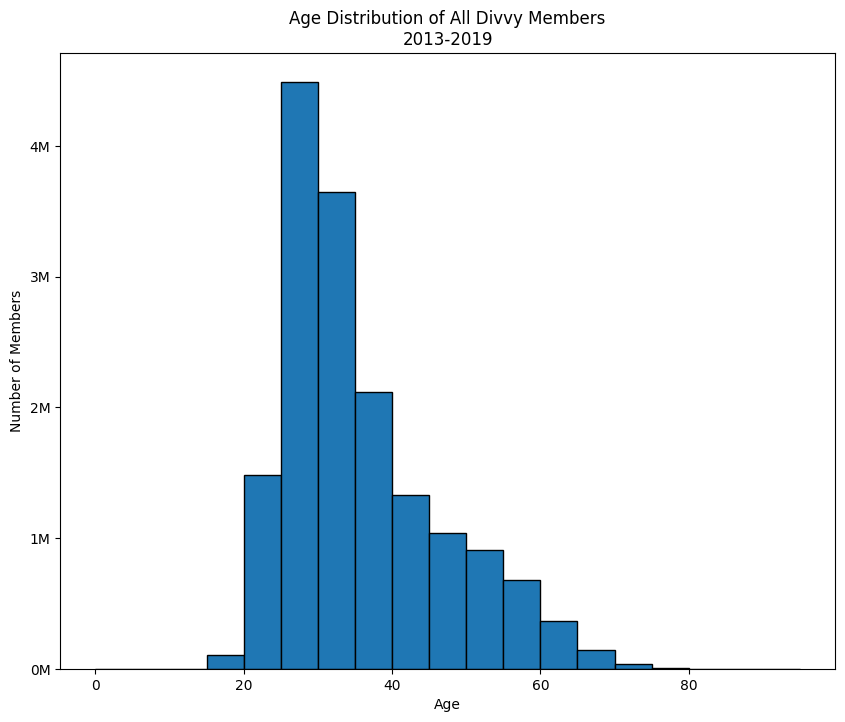

In [18]:
# Age Distribution
age_dist = divvy_data.dropna(subset=['Rider Age', 'GENDER'])
plt.figure(figsize=(10,8))
plt.hist(age_dist['Rider Age'], bins=range(0,100,5), edgecolor='black')
plt.title("Age Distribution of All Divvy Members\n2013-2019")
plt.xlabel("Age")
plt.ylabel("Number of Members")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
plt.show()

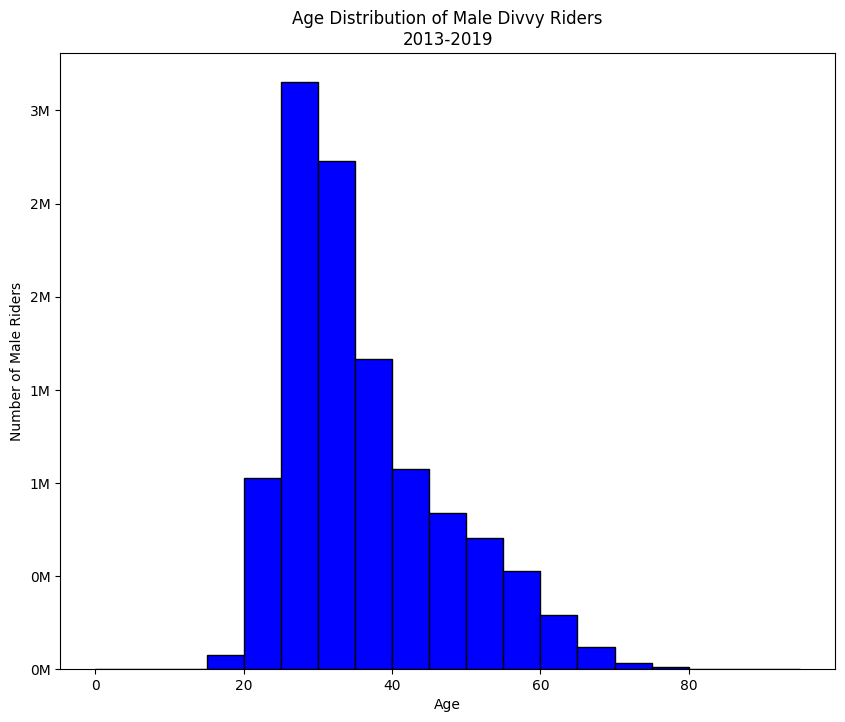

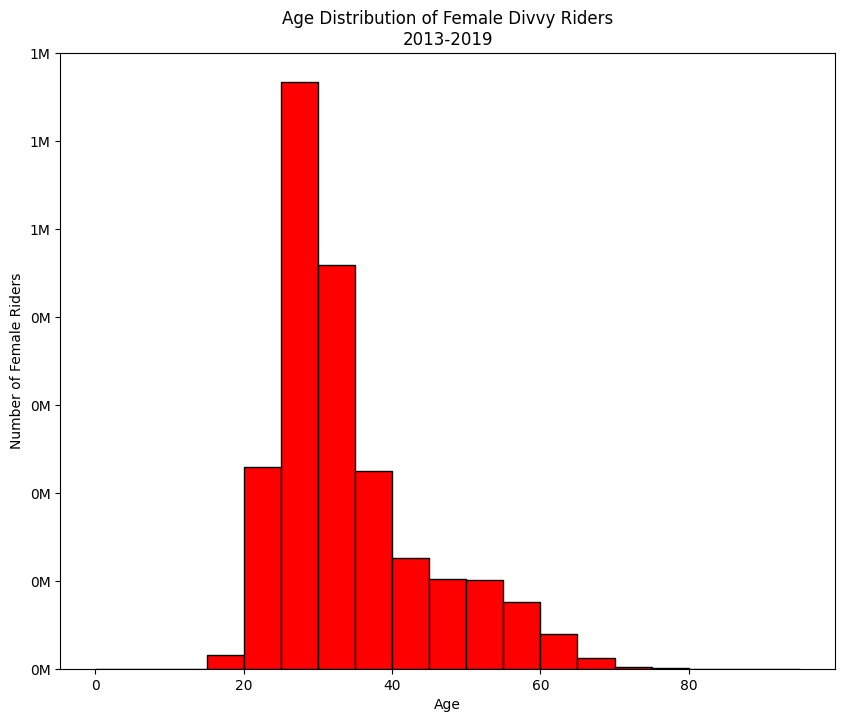

In [19]:
male_dist = age_dist[age_dist['GENDER'] == 'Male']
plt.figure(figsize=(10,8))
plt.hist(male_dist['Rider Age'], bins=range(0,100,5), color='blue', edgecolor='black')
plt.title('Age Distribution of Male Divvy Riders\n2013-2019')
plt.xlabel('Age')
plt.ylabel('Number of Male Riders')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
plt.show()

female_dist = age_dist[age_dist['GENDER'] == 'Female']
plt.figure(figsize=(10,8))
plt.hist(female_dist['Rider Age'], bins=range(0,100,5), color='red', edgecolor='black')
plt.title('Age Distribution of Female Divvy Riders\n2013-2019')
plt.xlabel('Age')
plt.ylabel('Number of Female Riders')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
plt.show()

---
### Weekday Ridership Trends

In [20]:
import datetime

In [21]:
def is_weekday(year, month, day):
    # Create datetime object
    date = datetime.date(year, month, day)
    # Check if it's a weekday (Monday=0, Sunday=6)
    return "Weekday" if date.weekday() < 5 else "Weekend"

In [22]:
divvy_data['Day Type'] = divvy_data.apply(lambda row: is_weekday(row['Start Year'], row['Start Month'], row['Start Day']), axis=1)

In [23]:
divvy_data.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age,Day Type
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),12,31,2015,1735,12,31,2015,1744,24.0,Weekday
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),12,31,2015,1737,12,31,2015,1741,23.0,Weekday
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),12,31,2015,1737,12,31,2015,1740,28.0,Weekday
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),12,31,2015,1738,12,31,2015,1755,40.0,Weekday
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),12,31,2015,1738,12,31,2015,1741,25.0,Weekday


In [24]:
# Create weekday ridership dataframe
divvy_weekday = divvy_data[divvy_data['Day Type'] == 'Weekday']
divvy_weekday.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age,Day Type
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),12,31,2015,1735,12,31,2015,1744,24.0,Weekday
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),12,31,2015,1737,12,31,2015,1741,23.0,Weekday
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),12,31,2015,1737,12,31,2015,1740,28.0,Weekday
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),12,31,2015,1738,12,31,2015,1755,40.0,Weekday
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),12,31,2015,1738,12,31,2015,1741,25.0,Weekday


In [25]:
# Import mdates from matplotlib
import matplotlib.dates as mdates

In [26]:
# Function for minutes from midnight
def time_to_minutes(timestring):
    hour = int(timestring[:2])
    minute = int(timestring[2:])
    return hour*60+minute

time_grouped = divvy_weekday.groupby('Start Time').size()
time_grouped.index = [time_to_minutes(t) for t in time_grouped.index]

# time_grouped.index = [time_to_minutes(t) for t in time_grouped.index]

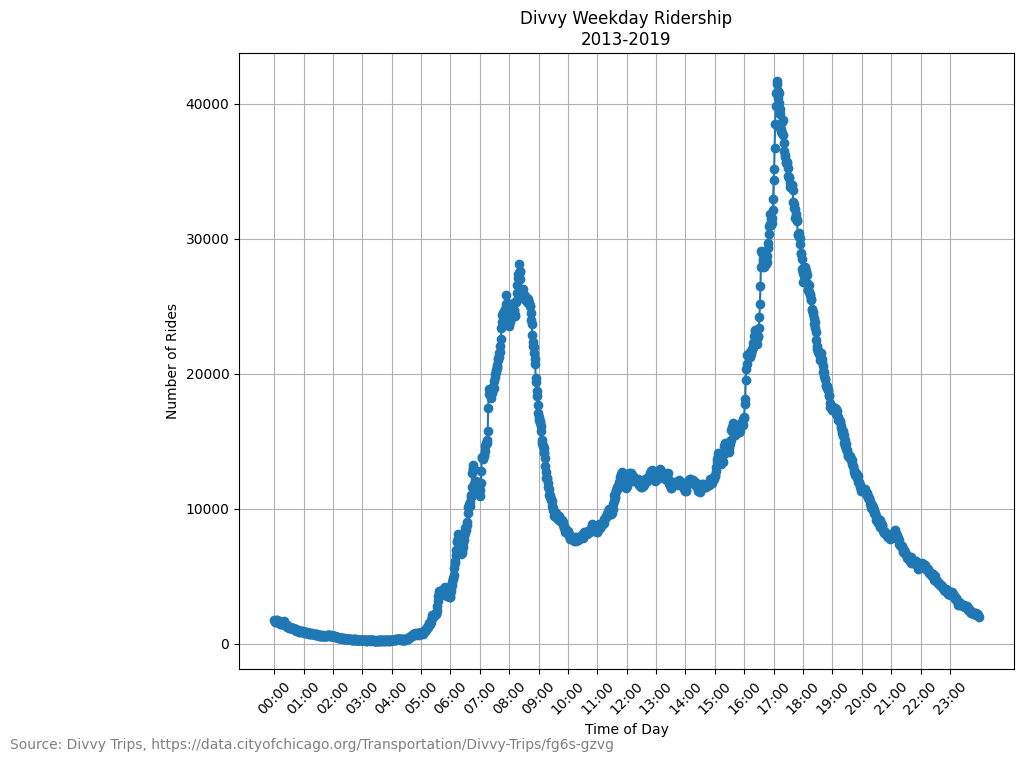

In [27]:
# Create plot
plt.figure(figsize=(10, 8))
plt.plot(time_grouped.index, time_grouped.values, marker = 'o')
# Format x-axis
num_hours = 24
hour_intervals = int(1440/num_hours)
time_labels = [f'{int(time/60):02d}:{time%60:02d}' for time in range(0,1440,hour_intervals)]
tick_positions = list(range(0,1440, hour_intervals))

plt.xticks(tick_positions, time_labels, rotation=45)

# Lables and title
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.title('Divvy Weekday Ridership\n2013-2019')
plt.figtext(0.5, 0.01, 'Source: Divvy Trips, https://data.cityofchicago.org/Transportation/Divvy-Trips/fg6s-gzvg', 
            ha='right', fontsize=10, color='gray')

plt.grid(True)
plt.show()

In [28]:
# Read in and concatenate newer data
updated_divvy = pd.read_csv("updated_divvy_data.csv")
divvy_update = pd.concat([divvy_data, updated_divvy], ignore_index=True)
divvy_update.head()

/var/folders/h6/yxy6glj14rd2c83llgj50xnc0000gn/T/ipykernel_58461/731580911.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  updated_divvy = pd.read_csv("updated_divvy_data.csv")


,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age,Day Type
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),12,31,2015,1735,12,31,2015,1744,24.0,Weekday
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),12,31,2015,1737,12,31,2015,1741,23.0,Weekday
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693.0,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),12,31,2015,1737,12,31,2015,1740,28.0,Weekday
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370.0,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),12,31,2015,1738,12,31,2015,1755,40.0,Weekday
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563.0,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),12,31,2015,1738,12,31,2015,1741,25.0,Weekday


In [29]:
print(divvy_update.columns[5], divvy_update.columns[7])
print(divvy_update.iloc[:, 5].apply(type).value_counts())
print(divvy_update.iloc[:, 7].apply(type).value_counts())


FROM STATION ID TO STATION ID
FROM STATION ID
<class 'int'>      22291316
<class 'str'>      14208955
<class 'float'>     4680218
Name: count, dtype: int64
TO STATION ID
<class 'int'>      21242740
<class 'str'>      14050972
<class 'float'>     5886777
Name: count, dtype: int64


In [30]:
# Convert columns to int
divvy_update.iloc[:, 5] = divvy_update.iloc[:, 5].astype(str) 
divvy_update.iloc[:, 7] = divvy_update.iloc[:, 7].astype(str) 


In [31]:
weekday_update = divvy_update[divvy_update['Day Type'] == 'Weekday']
weekday_update.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age,Day Type
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),12,31,2015,1735,12,31,2015,1744,24.0,Weekday
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),12,31,2015,1737,12,31,2015,1741,23.0,Weekday
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693.0,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),12,31,2015,1737,12,31,2015,1740,28.0,Weekday
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370.0,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),12,31,2015,1738,12,31,2015,1755,40.0,Weekday
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563.0,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),12,31,2015,1738,12,31,2015,1741,25.0,Weekday


In [32]:
updated_divvy['START TIME'] = pd.to_datetime(updated_divvy['START TIME'])
updated_divvy['STOP TIME'] = pd.to_datetime(updated_divvy['STOP TIME'])
updated_divvy.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Day Type,Rider Age
0,1068AB1B8F12FE23,2020-01-01 00:04:44,2020-01-01 00:17:08,NaN,744,115,Sheffield Ave & Wellington Ave,246.0,Ashland Ave & Belle Plaine Ave,Customer,NaN,NaN,41.9363,-87.6527,NaN,41.9561,-87.6688,NaN,1,1,2020,4,1,1,2020,17,Weekday,NaN
1,DCF74A0EB3284B3E,2020-01-01 00:10:37,2020-01-01 00:10:54,NaN,17,81,Daley Center Plaza,81.0,Daley Center Plaza,Subscriber,NaN,NaN,41.8842,-87.6296,NaN,41.8842,-87.6296,NaN,1,1,2020,10,1,1,2020,10,Weekday,NaN
2,4DE50A4FC7687A0D,2020-01-01 00:11:14,2020-01-01 00:15:32,NaN,258,81,Daley Center Plaza,624.0,Dearborn St & Van Buren St,Subscriber,NaN,NaN,41.8842,-87.6296,NaN,41.8763,-87.6292,NaN,1,1,2020,11,1,1,2020,15,Weekday,NaN
3,1C78B5F337CBFC93,2020-01-01 00:11:27,2020-01-01 00:13:15,NaN,108,240,Sheridan Rd & Irving Park Rd,256.0,Broadway & Sheridan Rd,Subscriber,NaN,NaN,41.9542,-87.6544,NaN,41.9528,-87.6500,NaN,1,1,2020,11,1,1,2020,13,Weekday,NaN
4,D231CE7990A3AA52,2020-01-01 00:12:34,2020-01-01 00:14:29,NaN,115,626,Delano Ct & Roosevelt Rd,59.0,Wabash Ave & Roosevelt Rd,Subscriber,NaN,NaN,41.8675,-87.6322,NaN,41.8672,-87.6260,NaN,1,1,2020,12,1,1,2020,14,Weekday,NaN


In [33]:
updated_divvy['Start Time'] = updated_divvy['START TIME'].dt.hour
updated_divvy['Stop Time'] = updated_divvy['STOP TIME'].dt.hour
updated_divvy.head(15)

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Day Type,Rider Age
0,1068AB1B8F12FE23,2020-01-01 00:04:44,2020-01-01 00:17:08,NaN,744,115,Sheffield Ave & Wellington Ave,246.0,Ashland Ave & Belle Plaine Ave,Customer,NaN,NaN,41.9363,-87.6527,NaN,41.9561,-87.6688,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
1,DCF74A0EB3284B3E,2020-01-01 00:10:37,2020-01-01 00:10:54,NaN,17,81,Daley Center Plaza,81.0,Daley Center Plaza,Subscriber,NaN,NaN,41.8842,-87.6296,NaN,41.8842,-87.6296,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
2,4DE50A4FC7687A0D,2020-01-01 00:11:14,2020-01-01 00:15:32,NaN,258,81,Daley Center Plaza,624.0,Dearborn St & Van Buren St,Subscriber,NaN,NaN,41.8842,-87.6296,NaN,41.8763,-87.6292,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
3,1C78B5F337CBFC93,2020-01-01 00:11:27,2020-01-01 00:13:15,NaN,108,240,Sheridan Rd & Irving Park Rd,256.0,Broadway & Sheridan Rd,Subscriber,NaN,NaN,41.9542,-87.6544,NaN,41.9528,-87.6500,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
4,D231CE7990A3AA52,2020-01-01 00:12:34,2020-01-01 00:14:29,NaN,115,626,Delano Ct & Roosevelt Rd,59.0,Wabash Ave & Roosevelt Rd,Subscriber,NaN,NaN,41.8675,-87.6322,NaN,41.8672,-87.6260,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
5,2295556346560999,2020-01-01 00:19:12,2020-01-01 00:26:36,NaN,444,326,Clark St & Leland Ave,318.0,Southport Ave & Irving Park Rd,Subscriber,NaN,NaN,41.9671,-87.6674,NaN,41.9542,-87.6644,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
6,EB21BB139ABF6174,2020-01-01 00:21:01,2020-01-01 00:29:35,NaN,514,326,Clark St & Leland Ave,460.0,Clark St & Bryn Mawr Ave,Subscriber,NaN,NaN,41.9671,-87.6674,NaN,41.9836,-87.6692,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
7,E0ECDAD877BC9A09,2020-01-01 00:21:16,2020-01-01 00:29:39,NaN,503,326,Clark St & Leland Ave,460.0,Clark St & Bryn Mawr Ave,Subscriber,NaN,NaN,41.9671,-87.6674,NaN,41.9836,-87.6692,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
8,5C336EDA9744D287,2020-01-01 00:22:39,2020-01-01 00:32:23,NaN,584,347,Ashland Ave & Grace St,153.0,Southport Ave & Wellington Ave,Customer,NaN,NaN,41.9507,-87.6687,NaN,41.9357,-87.6636,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
9,CB338BD9A75AA107,2020-01-01 00:23:00,2020-01-01 00:43:31,NaN,1231,90,Millennium Park,22.0,May St & Taylor St,Subscriber,NaN,NaN,41.8810,-87.6241,NaN,41.8695,-87.6555,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN


In [34]:
weekday_update = updated_divvy[updated_divvy['Day Type'] == 'Weekday']
weekday_update.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Day Type,Rider Age
0,1068AB1B8F12FE23,2020-01-01 00:04:44,2020-01-01 00:17:08,NaN,744,115,Sheffield Ave & Wellington Ave,246.0,Ashland Ave & Belle Plaine Ave,Customer,NaN,NaN,41.9363,-87.6527,NaN,41.9561,-87.6688,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
1,DCF74A0EB3284B3E,2020-01-01 00:10:37,2020-01-01 00:10:54,NaN,17,81,Daley Center Plaza,81.0,Daley Center Plaza,Subscriber,NaN,NaN,41.8842,-87.6296,NaN,41.8842,-87.6296,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
2,4DE50A4FC7687A0D,2020-01-01 00:11:14,2020-01-01 00:15:32,NaN,258,81,Daley Center Plaza,624.0,Dearborn St & Van Buren St,Subscriber,NaN,NaN,41.8842,-87.6296,NaN,41.8763,-87.6292,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
3,1C78B5F337CBFC93,2020-01-01 00:11:27,2020-01-01 00:13:15,NaN,108,240,Sheridan Rd & Irving Park Rd,256.0,Broadway & Sheridan Rd,Subscriber,NaN,NaN,41.9542,-87.6544,NaN,41.9528,-87.6500,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN
4,D231CE7990A3AA52,2020-01-01 00:12:34,2020-01-01 00:14:29,NaN,115,626,Delano Ct & Roosevelt Rd,59.0,Wabash Ave & Roosevelt Rd,Subscriber,NaN,NaN,41.8675,-87.6322,NaN,41.8672,-87.6260,NaN,1,1,2020,0,1,1,2020,0,Weekday,NaN


In [35]:
weekday_update_hourly = weekday_update.groupby('Start Time').size()

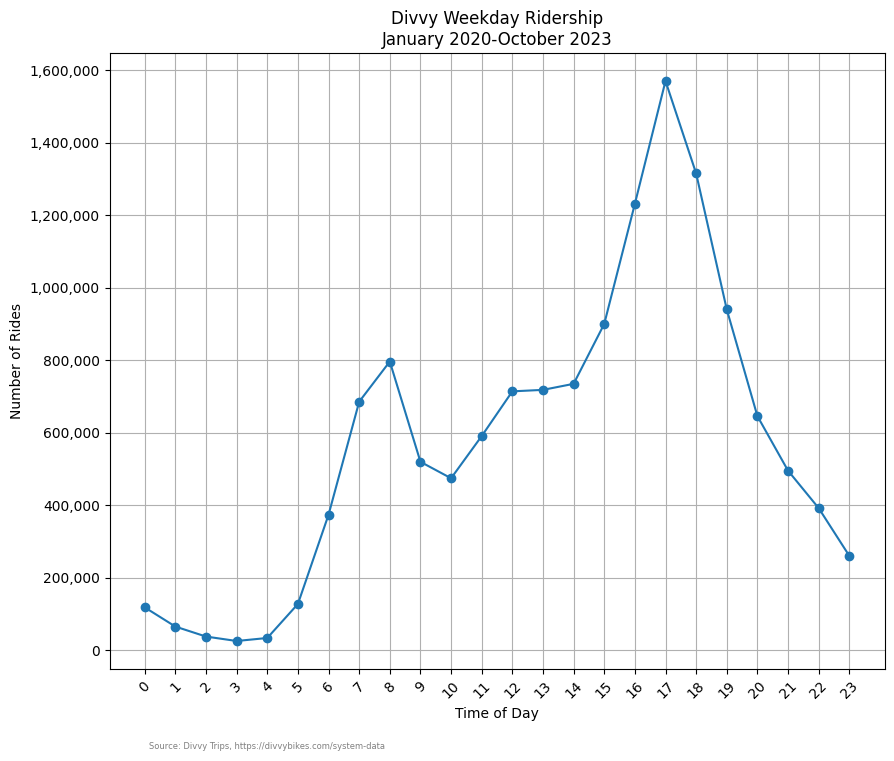

In [36]:
# Format x-axis
# num_hours = 24
# hour_intervals = int(1440/num_hours)
# time_labels = [f'{int(time/60):02d}:{time%60:02d}' for time in range(0,1440,hour_intervals)]
# tick_positions = list(range(0,1440, hour_intervals))

# plt.xticks(tick_positions, time_labels, rotation=45)
import matplotlib.ticker as ticker
# Lables and title
plt.figure(figsize=(10,8))
plt.plot(weekday_update_hourly.index, weekday_update_hourly.values, marker='o')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0,24), rotation=45)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Divvy Weekday Ridership\nJanuary 2020-October 2023')
plt.figtext(0.4, 0.01, 'Source: Divvy Trips, https://divvybikes.com/system-data', 
            ha='right', fontsize=6, color='gray')

plt.grid(True)
plt.show()

---
---
### Yearly Ridership Trends

In [37]:
divvy_update = pd.concat([divvy_data, updated_divvy], ignore_index=True)

In [38]:
divvy_update.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age,Day Type
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),12,31,2015,1735,12,31,2015,1744,24.0,Weekday
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),12,31,2015,1737,12,31,2015,1741,23.0,Weekday
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693.0,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),12,31,2015,1737,12,31,2015,1740,28.0,Weekday
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370.0,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),12,31,2015,1738,12,31,2015,1755,40.0,Weekday
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563.0,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),12,31,2015,1738,12,31,2015,1741,25.0,Weekday


In [39]:
yearly_ridership = divvy_update.groupby('Start Year').size()

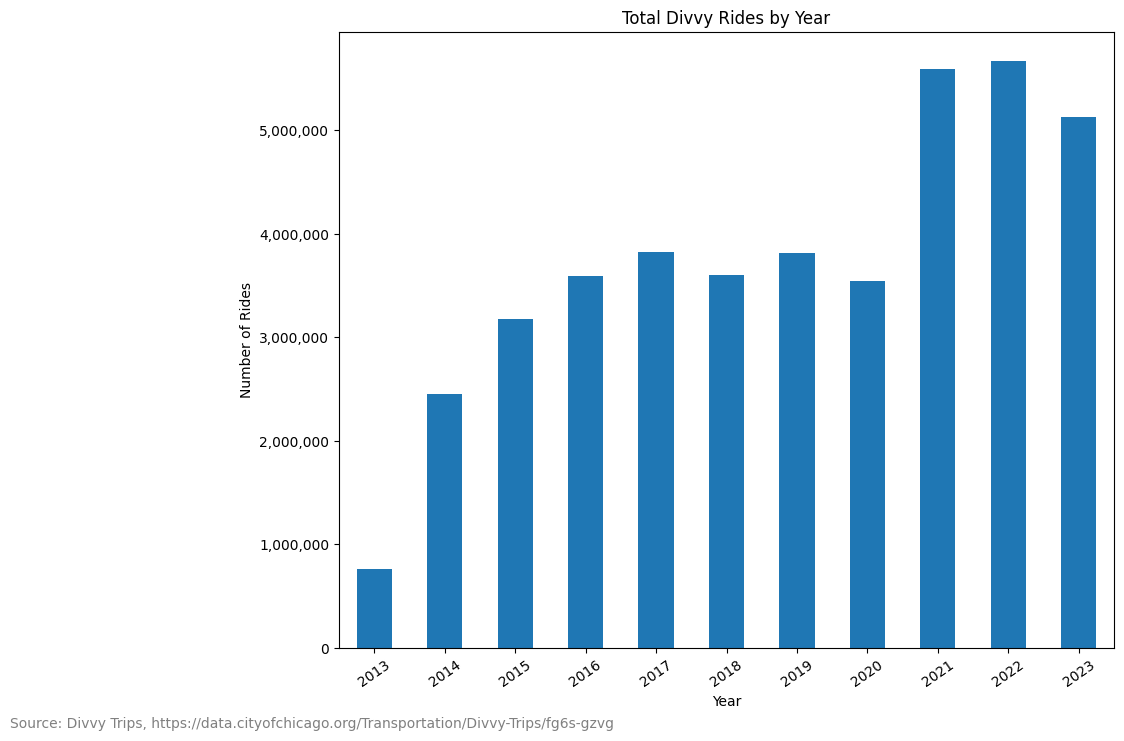

In [40]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10,8))
yearly_ridership.plot(kind='bar')

plt.title('Total Divvy Rides by Year')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.xticks(rotation=35)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.figtext(0.4, 0.01, 'Source: Divvy Trips, https://data.cityofchicago.org/Transportation/Divvy-Trips/fg6s-gzvg', 
            ha='right', fontsize=10, color='gray')
plt.show()

---
---
### Calendar Heat Map

In [41]:
import seaborn as sns
import calendar
import numpy as np

In [42]:
divvy_update.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age,Day Type
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),12,31,2015,1735,12,31,2015,1744,24.0,Weekday
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),12,31,2015,1737,12,31,2015,1741,23.0,Weekday
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693.0,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),12,31,2015,1737,12,31,2015,1740,28.0,Weekday
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370.0,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),12,31,2015,1738,12,31,2015,1755,40.0,Weekday
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563.0,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),12,31,2015,1738,12,31,2015,1741,25.0,Weekday


In [43]:
heatmap = divvy_update
heatmap.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age,Day Type
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),12,31,2015,1735,12,31,2015,1744,24.0,Weekday
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),12,31,2015,1737,12,31,2015,1741,23.0,Weekday
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693.0,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),12,31,2015,1737,12,31,2015,1740,28.0,Weekday
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370.0,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),12,31,2015,1738,12,31,2015,1755,40.0,Weekday
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563.0,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),12,31,2015,1738,12,31,2015,1741,25.0,Weekday


In [44]:
heatmap['START TIME'] = pd.to_datetime(heatmap['START TIME'])
heatmap['DATE'] = heatmap['START TIME'].dt.date


In [45]:
heatmap.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age,Day Type,DATE
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),12,31,2015,1735,12,31,2015,1744,24.0,Weekday,2015-12-31
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),12,31,2015,1737,12,31,2015,1741,23.0,Weekday,2015-12-31
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693.0,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),12,31,2015,1737,12,31,2015,1740,28.0,Weekday,2015-12-31
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370.0,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),12,31,2015,1738,12,31,2015,1755,40.0,Weekday,2015-12-31
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563.0,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),12,31,2015,1738,12,31,2015,1741,25.0,Weekday,2015-12-31


In [46]:
heatmap_daily_rides = heatmap.groupby('DATE').size()

In [47]:
# Function to create heat map
def create_heatmap_data(year, month):
    # Number of days in month and day of week the day starts on
    num_days = calendar.monthrange(year, month)[1]
    start_day = pd.Timestamp(year, month, 1).dayofweek
    num_weeks = np.ceil((num_days + start_day) / 7).astype(int)

    # Create empty matrix with a size to fit all days of the month
    heatmap_data = np.zeros((num_weeks,7))
    for day in range(1, num_days + 1):
        week = (day + start_day - 1) // 7
        day_of_week = (day + start_day - 1) % 7
        date = pd.Timestamp(year, month, day).date()
        heatmap_data[week, day_of_week] = heatmap_daily_rides.get(date, 0)

    return(heatmap_data)

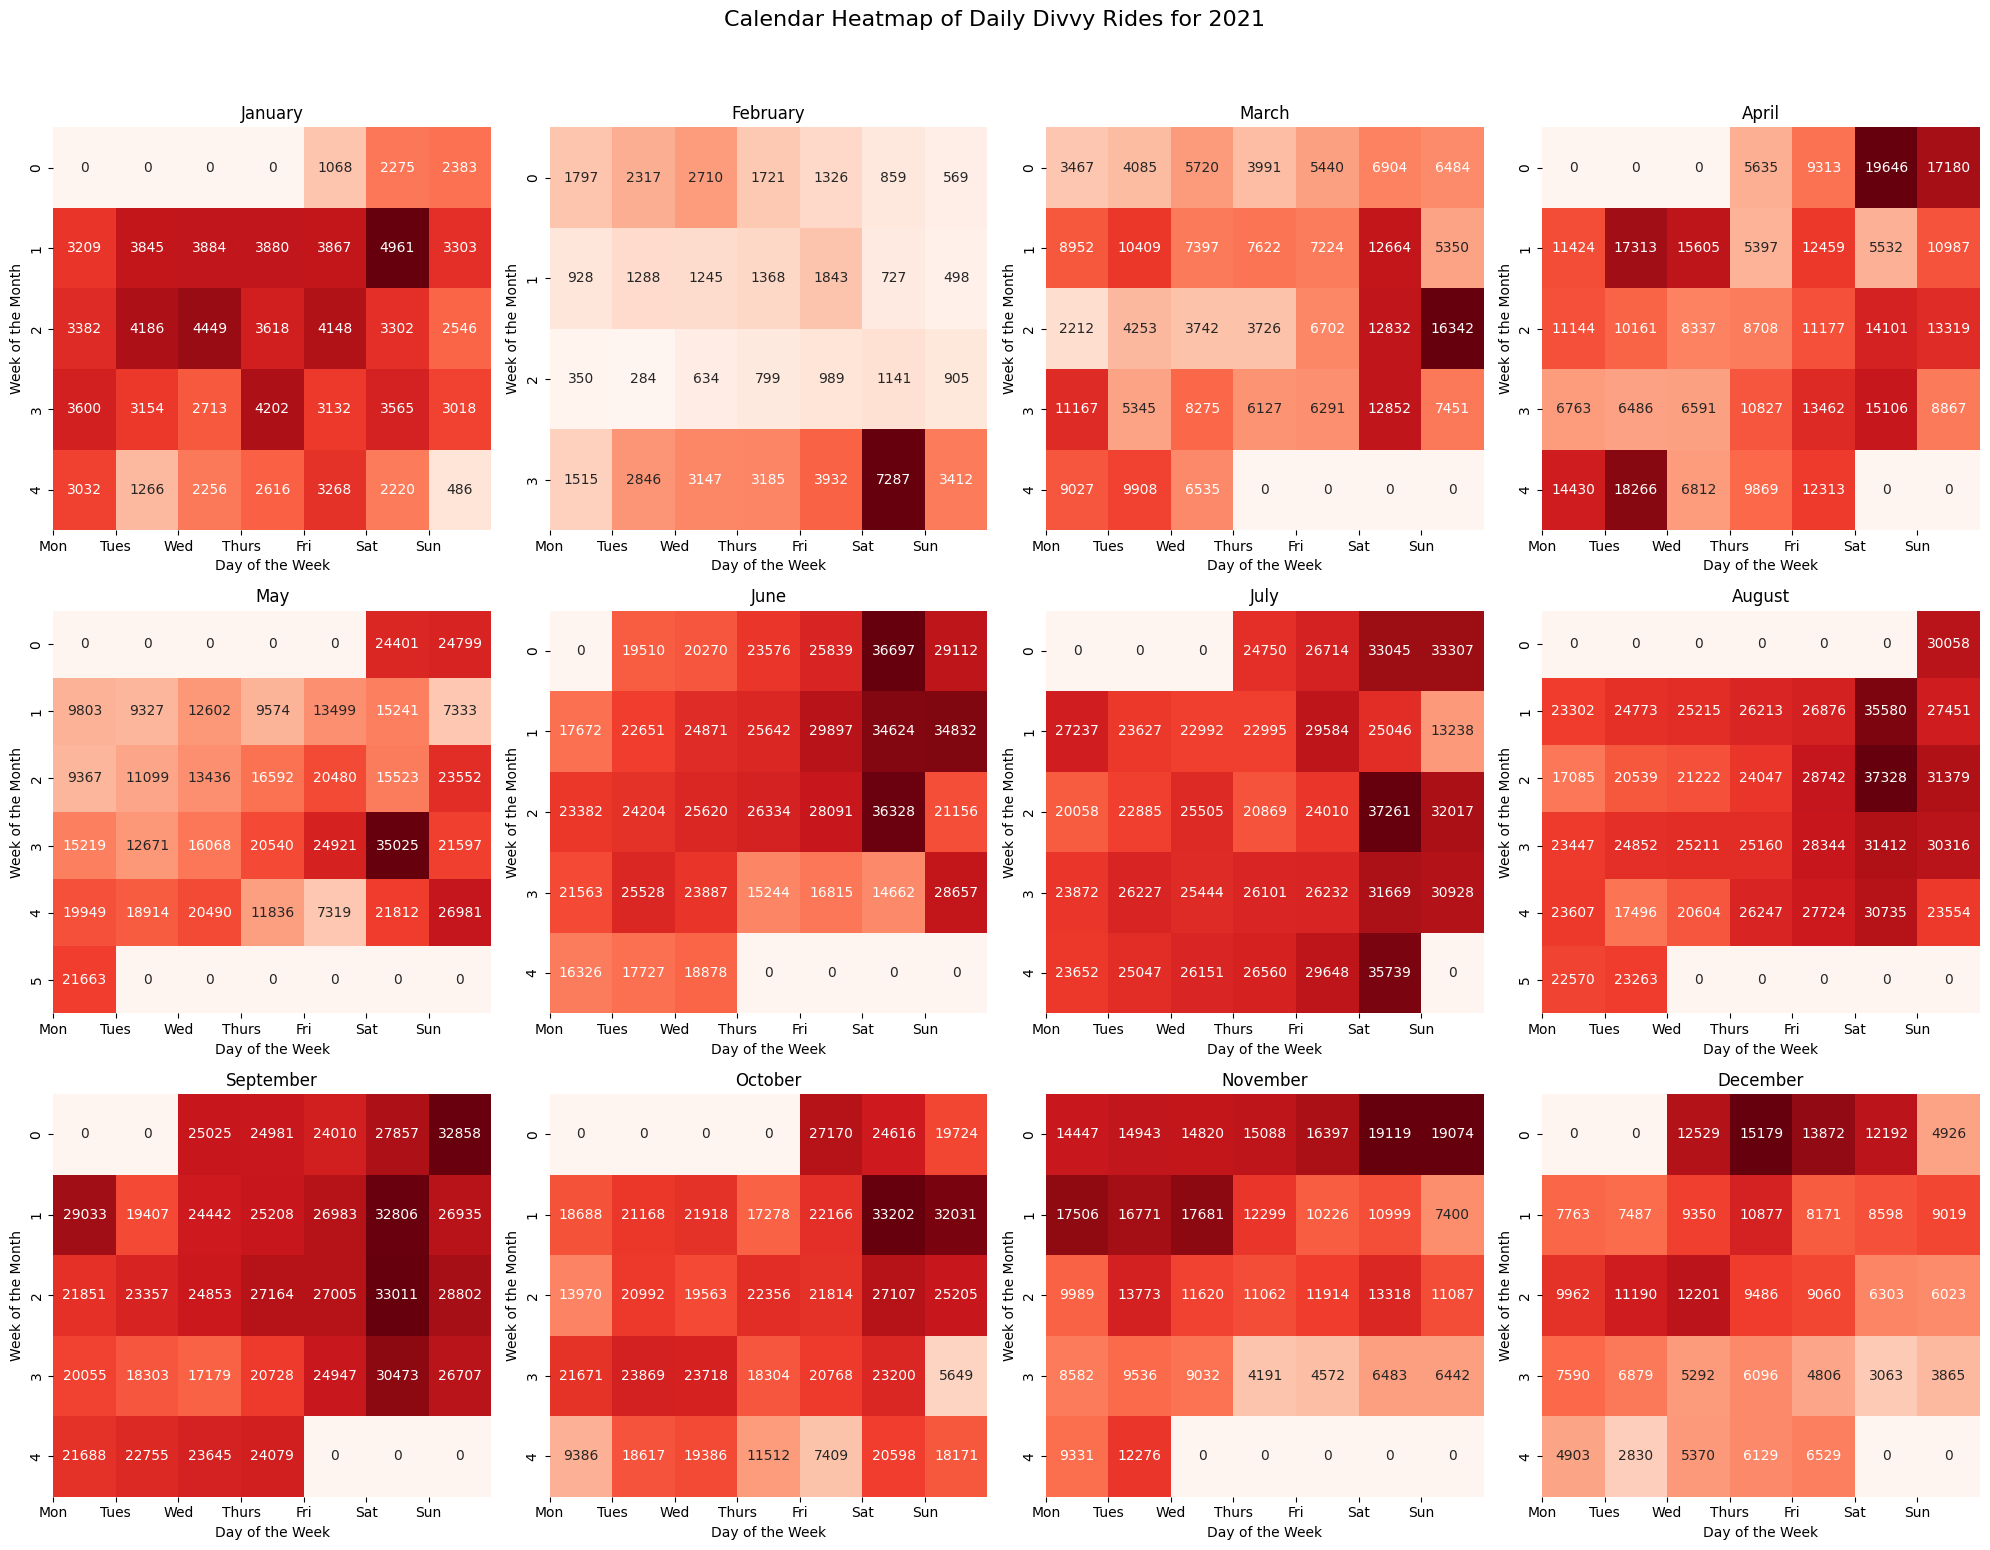

In [48]:
year = 2021
plt.figure(figsize=(20,15))
plt.suptitle(f'Calendar Heatmap of Daily Divvy Rides for {year}', fontsize=16, y = 1.03)
for month in range(1, 13):
    plt.subplot(3,4, month)
    sns.heatmap(create_heatmap_data(year, month), cmap="Reds", cbar=False, annot=True, fmt='.0f')
    plt.title(calendar.month_name[month])
    plt.xlabel("Day of the Week")
    plt.ylabel("Week of the Month")
    plt.xticks(np.arange(7), ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

---
---
### Popular Routes

In [49]:
popular_routes = divvy_update[divvy_update['FROM STATION NAME'] != divvy_update['TO STATION NAME']]
popular_routes.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age,Day Type,DATE
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),12,31,2015,1735,12,31,2015,1744,24.0,Weekday,2015-12-31
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),12,31,2015,1737,12,31,2015,1741,23.0,Weekday,2015-12-31
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693.0,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),12,31,2015,1737,12,31,2015,1740,28.0,Weekday,2015-12-31
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370.0,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),12,31,2015,1738,12,31,2015,1755,40.0,Weekday,2015-12-31
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563.0,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),12,31,2015,1738,12,31,2015,1741,25.0,Weekday,2015-12-31


In [50]:
popular_routes = popular_routes.groupby(['FROM STATION NAME', 'TO STATION NAME']).size()

In [51]:
popular_routes = popular_routes.reset_index(name='Ride Count')
popular_routes = popular_routes.sort_values(by='Ride Count', ascending=False)
popular_routes.head(10)

,FROM STATION NAME,TO STATION NAME,Ride Count
162689,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,46236
284910,Streeter Dr & Grand Ave,Theater on the Lake,30271
286474,Theater on the Lake,Streeter Dr & Grand Ave,26971
284749,Streeter Dr & Grand Ave,Millennium Park,26088
106510,Ellis Ave & 60th St,Ellis Ave & 55th St,24814
284664,Streeter Dr & Grand Ave,Lake Shore Dr & North Blvd,23393
200951,Michigan Ave & Oak St,Theater on the Lake,23327
106681,Ellis Ave & 60th St,University Ave & 57th St,23256
284663,Streeter Dr & Grand Ave,Lake Shore Dr & Monroe St,23197
284743,Streeter Dr & Grand Ave,Michigan Ave & Oak St,22843


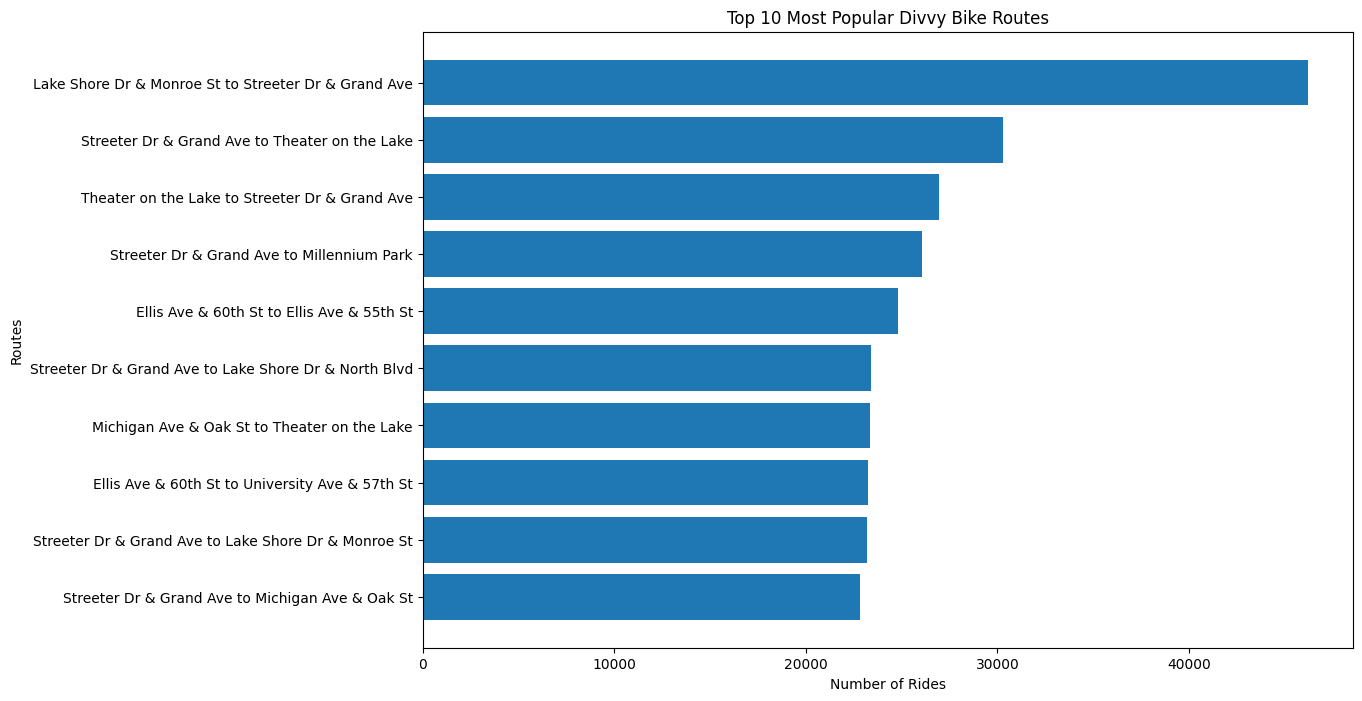

In [52]:
top_10_routes = popular_routes.head(10)

plt.figure(figsize=(12,8))
y_pos = range(len(top_10_routes))
plt.barh(y_pos, top_10_routes['Ride Count'])
route_labels = [f'{row["FROM STATION NAME"]} to {row["TO STATION NAME"]}' for index, row in top_10_routes.iterrows()]

plt.yticks(y_pos, route_labels)

plt.xlabel('Number of Rides')
plt.ylabel('Routes')
plt.title('Top 10 Most Popular Divvy Bike Routes')

plt.gca().invert_yaxis()
plt.show()

---
---
### Mapping the Popular Routes

In [53]:
%pip install folium

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [54]:
import folium

In [55]:
divvy_update.head(5)

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Start Month,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age,Day Type,DATE
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739),12,31,2015,1735,12,31,2015,1744,24.0,Weekday,2015-12-31
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613),12,31,2015,1737,12,31,2015,1741,23.0,Weekday,2015-12-31
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693.0,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968),12,31,2015,1737,12,31,2015,1740,28.0,Weekday,2015-12-31
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370.0,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892),12,31,2015,1738,12,31,2015,1755,40.0,Weekday,2015-12-31
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563.0,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666),12,31,2015,1738,12,31,2015,1741,25.0,Weekday,2015-12-31


In [56]:
station_coords = divvy_update[['FROM STATION NAME', 'FROM LATITUDE', 'FROM LONGITUDE', 'TO STATION NAME', 'TO LATITUDE', 'TO LONGITUDE']].drop_duplicates()

In [57]:
station_coords.head()

,FROM STATION NAME,FROM LATITUDE,FROM LONGITUDE,TO STATION NAME,TO LATITUDE,TO LONGITUDE
0,Wilton Ave & Belmont Ave,41.940180,-87.653040,Southport Ave & Roscoe St,41.943739,-87.664020
1,Clark St & Schiller St,41.907993,-87.631501,Clybourn Ave & Division St,41.904613,-87.640552
2,Marine Dr & Ainslie St,41.971600,-87.650154,Clarendon Ave & Leland Ave,41.967968,-87.650001
3,Ashland Ave & Blackhawk St,41.907066,-87.667252,Green St (Halsted St) & Madison St,41.881892,-87.648789
4,Larrabee St & Kingsbury St,41.897764,-87.642884,Sedgwick St & Huron St,41.894666,-87.638437


In [58]:
# Merge with top 10 routes to get coordinates
top_10_routes_coords = top_10_routes.merge(station_coords, on=['FROM STATION NAME', 'TO STATION NAME'])
top_10_routes_coords.head()

,FROM STATION NAME,TO STATION NAME,Ride Count,FROM LATITUDE,FROM LONGITUDE,TO LATITUDE,TO LONGITUDE
0,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,46236,41.880958,-87.616743,41.891071,-87.612200
1,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,46236,41.880958,-87.616743,41.892278,-87.612043
2,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,46236,41.881000,-87.616700,41.892300,-87.612000
3,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,46236,41.880932,-87.616761,41.892219,-87.612053
4,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,46236,41.881127,-87.616755,41.892115,-87.611999


In [59]:
%pip install geopandas
import geopandas as gpd


--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [60]:
%pip install shapely

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [61]:
from shapely.geometry import LineString, Point

In [62]:
# top 3 routes
chicago_map = gpd.read_file('geo_export_58b3f3f3-1ba4-40a3-aa5c-c125dd49cbea.shp')

In [63]:
top_3_routes = popular_routes.head(3)
top_3_routes

,FROM STATION NAME,TO STATION NAME,Ride Count
162689,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,46236
284910,Streeter Dr & Grand Ave,Theater on the Lake,30271
286474,Theater on the Lake,Streeter Dr & Grand Ave,26971


In [64]:
top_3_start_points = top_3_routes.merge(station_coords, on=['FROM STATION NAME', 'TO STATION NAME'])
top_3_start_points


,FROM STATION NAME,TO STATION NAME,Ride Count,FROM LATITUDE,FROM LONGITUDE,TO LATITUDE,TO LONGITUDE
0,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,46236,41.880958,-87.616743,41.891071,-87.612200
1,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,46236,41.880958,-87.616743,41.892278,-87.612043
2,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,46236,41.881000,-87.616700,41.892300,-87.612000
3,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,46236,41.880932,-87.616761,41.892219,-87.612053
4,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,46236,41.881127,-87.616755,41.892115,-87.611999
...,...,...,...,...,...,...,...
2644,Theater on the Lake,Streeter Dr & Grand Ave,26971,41.926274,-87.630966,41.892278,-87.612043
2645,Theater on the Lake,Streeter Dr & Grand Ave,26971,41.926255,-87.630954,41.892278,-87.612043
2646,Theater on the Lake,Streeter Dr & Grand Ave,26971,41.926264,-87.630916,41.892278,-87.612043
2647,Theater on the Lake,Streeter Dr & Grand Ave,26971,41.926251,-87.630928,41.892278,-87.612043


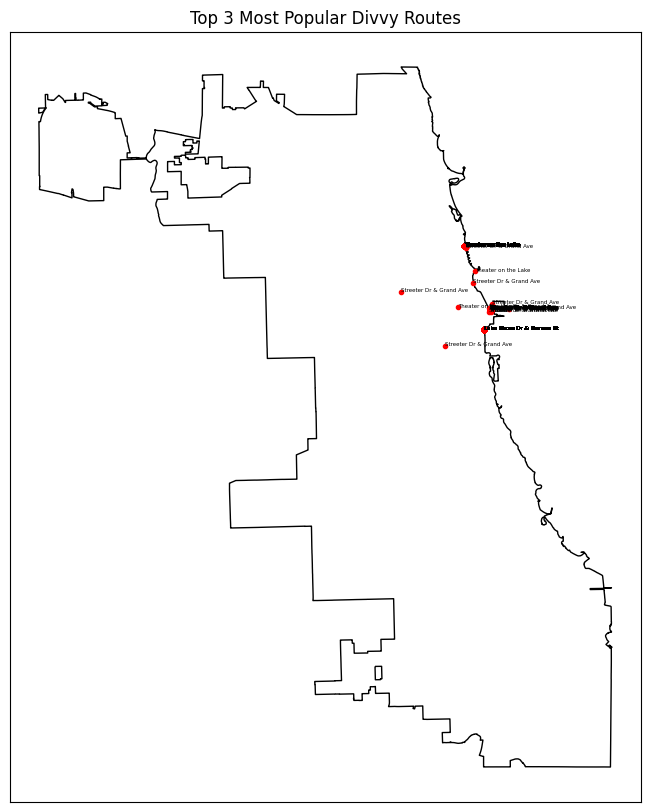

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
chicago_map.plot(ax=ax, color='white', edgecolor='black')

for idx, row in top_3_start_points.iterrows():
    start_coord = (row['FROM LONGITUDE'], row['FROM LATITUDE'])
    end_coord = (row['TO LONGITUDE'], row['TO LATITUDE'])

    plt.plot([start_coord[0], end_coord[0]], [start_coord[1], end_coord[1]], 'o', color='red', markersize=3)
    #plt.plot([start_coord[0], end_coord[0]], [start_coord[1], end_coord[1]], color='black', linewidth=row['Ride Count']/1000000)
    plt.text(start_coord[0], start_coord[1], row['FROM STATION NAME'], fontsize=4)
    plt.text(end_coord[0], end_coord[1], row['TO STATION NAME'], fontsize=4)

ax.set_xticks([])
ax.set_yticks([])

plt.title('Top 3 Most Popular Divvy Routes')
plt.show()